In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

## Sales at The Bread Basket bakery



In this notebook we will be visualizing the 2016-2017 sales data at *The Bread Basket* bakery in Edinburgh.

The data comes from the set published at [kaggle](https://www.kaggle.com/akashdeepkuila/bakery) with the *CC0* license.

Let's get familiar with the content of the notebook and follow the instructions to prepare the data that we are going to need during classes.

**Note!** When you come back to the document later, remember to re-run the code cells.

### Dataset contents

In the **bakery_sales.csv** file imported below there are 20 507 items assigned to 9 684 client transactions with the information on:


*   **TransactionNo** - transaction number
*   **Items** - purchased items
*   **DateTime** - time of transaction
*   **Daypart** - time of the day
*   **DayType** - weekday or weekend.

The necessary data is provided with the document: the code below imports the files we need.

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Data is imported to a pandas DataFrame which lets us work on visualizing them in an efficient way.

In [4]:
bakery_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Vis/Bakery data/Bakery.csv')
bakery_data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


## Notebook preparation

We want to start by making sure that the data has been correctly identified and make necessary conversions.

Based on data overview, we expect the first column to contain consecutive integers; the second one: names of sold products; third: the data identified as time-based; and the last two columns should have text-based information.

### Checking data types

Below, we need to run the listed instructions to get the DataFrames used during classes.

First let's check how the data was identified on import.

In [5]:
bakery_data.dtypes

,0
TransactionNo,int64
Items,object
DateTime,object
Daypart,object
DayType,object


Let's make sure the data has records with missing information for any of the columns.

In [6]:
"complete records: " + str(len(bakery_data.dropna(how="any"))) + "; total records: " + str(len(bakery_data))

'complete records: 20507; total records: 20507'

Let's also take a look at what data is really hidden under the **object** type for each of the columns.

In [7]:
for column in bakery_data.columns:
  check_types = bakery_data[column].apply(lambda x: type(x))
  print(check_types.value_counts())

TransactionNo
<class 'int'>    20507
Name: count, dtype: int64
Items
<class 'str'>    20507
Name: count, dtype: int64
DateTime
<class 'str'>    20507
Name: count, dtype: int64
Daypart
<class 'str'>    20507
Name: count, dtype: int64
DayType
<class 'str'>    20507
Name: count, dtype: int64


#### Date conversion

In the case of transaction time it is by default identified as a *string*.

Let's change the **DateTime** column data to *timestamp*.

In [8]:
bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])

We'll add a new column with translation date, callled **Date** and validate the conversion.

In [9]:
bakery_data["Date"] = bakery_data["DateTime"].dt.date

In [10]:
bakery_data["Date"].value_counts()

,count
Date,
2017-04-02,292
2016-05-11,275
2017-04-03,257
2017-03-25,246
2017-01-28,237
...,...
2017-09-04,69
2017-01-16,66
2016-08-12,66


Because we are not going to use the information about time, in **bakery_data** we can leave just the column with the date.

In [11]:
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart", "DayType"]]
bakery_data

,TransactionNo,Items,Date,Daypart,DayType
0,1,Bread,2016-10-30,Morning,Weekend
1,2,Scandinavian,2016-10-30,Morning,Weekend
2,2,Scandinavian,2016-10-30,Morning,Weekend
3,3,Hot chocolate,2016-10-30,Morning,Weekend
4,3,Jam,2016-10-30,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend
20503,9682,Tea,2017-09-04,Afternoon,Weekend
20504,9683,Coffee,2017-09-04,Afternoon,Weekend
20505,9683,Pastry,2017-09-04,Afternoon,Weekend


#### Category assignment based on the number of sold products.

Let's take a closer look at the contents of the **Items** category.

In [12]:
bakery_data["Items"].value_counts()

,count
Items,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
...,...
Bacon,1
Gift voucher,1
Olum & polenta,1


We see that in the period we analyze many products were sold with a varied frequency.

We'll add categorization by adding the **Item Categories** column that will enable us to highlight top 5 products and assign the "Other" category to the remaining ones.

In [13]:
product_categories = list(bakery_data["Items"].value_counts().index)[0:5]
product_categories.append("Other")
product_categories
bakery_data["Item Categories"] = pd.Series(pd.Categorical(bakery_data["Items"], categories=product_categories)).fillna("Other")
bakery_data

,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


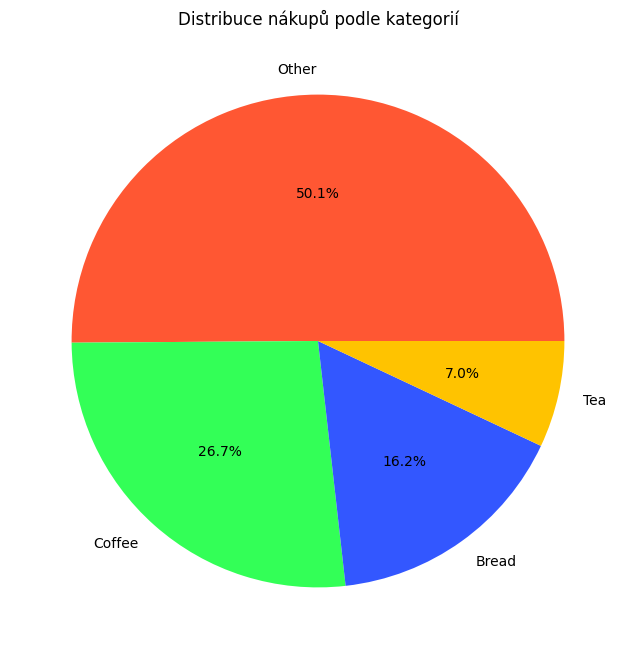

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the colors and create a colormap
colors = ['#FF5733', '#33FF57', '#3357FF', '#FFC300', '#808080']
my_colormap = ListedColormap(colors)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_summary['Total Sold'],  # Data for the pie chart
    labels=category_summary['Category'],  # Labels for the pie chart
    colors=colors[:len(category_summary)],  # Use the list of colors
    autopct='%1.1f%%'  # Show percentages
)
plt.title('Distribuce nákupů podle kategorií')  # Chart title
plt.show()


#### Converting times of day to categories

Let's take a closer look at the contents of the **Daypart** category.

In [ ]:
bakery_data["Daypart"].value_counts()

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: count, dtype: int64

In the case of this column the list of categories is a short one: we only want the order of the times of day in the visualization to be a natural one.

We'll define a new **Day Part** column, set the correct category order and use it to replace the current **Daypart** column.

#### Converting day types to categories

Let's take a closer look at the **Day Type** column contents.

In [ ]:
bakery_data["DayType"].value_counts()

DayType
Weekday    12807
Weekend     7700
Name: count, dtype: int64

Similarly to the time of day, the list of categories is short. We'll prepare a new **Day Type** column just like before and remove the unnecessary column.

In [ ]:
bakery_data["Day Type"] = pd.Series(pd.Categorical(bakery_data["DayType"], categories=["Weekday", "Weekend"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart","Day Type", "Item Categories"]]
bakery_data

,TransactionNo,Items,Date,Daypart,Day Type,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


### Creating dataframes used in the visualization

Besides the **bakery_data** set, for class we are going to need several other points of view to base our visualization on.

#### Daily statistics

Below, we are calculating how many products, and in how many transactions, were purchased daily, divided by type of day.

In [ ]:
items_daily = bakery_data[["Date","Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
transactions_daily = bakery_data[["Date","Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()
daytype_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Type"])
daytype_statistics_daily

Items  TransactionNo
Date       Day Type                      
2016-01-11 Weekday     150             77
           Weekend       0              0
2016-01-12 Weekday      83             47
           Weekend       0              0
2016-02-11 Weekday     164             83
...                    ...            ...
2017-12-01 Weekend       0              0
2017-12-02 Weekday       0              0
           Weekend     113             48
2017-12-03 Weekday       0              0
           Weekend     146             62

[318 rows x 2 columns]

Below, we are calculating how many products, and in how many transactions, were purchased daily, divided by time of day.

In [ ]:
items_daily = bakery_data[["Date","Daypart", "Items"]].groupby(["Date", "Daypart"]).count()
transactions_daily = bakery_data[["Date","Daypart", "TransactionNo"]].groupby(["Date", "Daypart"]).nunique()
daypart_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Daypart"])
daypart_statistics_daily

Items  TransactionNo
Date       Daypart                        
2016-01-11 Afternoon     92             46
           Evening        2              2
           Morning       56             29
2016-01-12 Afternoon     50             28
           Evening        2              2
...                     ...            ...
2017-12-02 Afternoon     50             22
           Evening        2              2
           Morning       61             24
2017-12-03 Afternoon    114             47
           Morning       32             15

[415 rows x 2 columns]

#### Category statistics

Finally, we also return the number of products purchased via transactions with part and type of the day information.

In [ ]:
items_count = bakery_data[["TransactionNo", "Items"]].groupby(["TransactionNo"]).count()
transactions_data = pd.merge(pd.DataFrame(bakery_data[["TransactionNo", "Day Type", "Daypart"]].drop_duplicates()), items_count, on="TransactionNo")
transactions_data

,TransactionNo,Day Type,Daypart,Items
0,1,Weekend,Morning,1
1,2,Weekend,Morning,2
2,3,Weekend,Morning,3
3,4,Weekend,Morning,1
4,5,Weekend,Morning,3
...,...,...,...,...
9460,9680,Weekend,Afternoon,1
9461,9681,Weekend,Afternoon,4
9462,9682,Weekend,Afternoon,4
9463,9683,Weekend,Afternoon,2


## Exercises